# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>




In this notebook I study the one–dimensional Ising model in the canonical ensemble by implementing Monte Carlo simulations. Two different sampling schemes have been employed: the Metropolis algorithm and the Gibbs sampler, both of which are designed to generate spin configurations distributed according to the Boltzmann weight.  

The aim of the simulations is to compute key thermodynamic observables — internal energy, magnetization, specific heat, and magnetic susceptibility — and to compare the numerical estimates with the exact analytical results available for the 1D Ising model.  

  


The notebook is organized into three main sections:

- [Ising model 1D](#ising-model-1d) 
  In this part I introduce the one–dimensional Ising model, its Hamiltonian, and the thermodynamic observables of interest, both in their analytical and statistical form.  

- [Gibbs algorithm](#gibbs-algorithm) 
  I describe the Gibbs sampling method and its implementation within the simulation code, emphasizing its differences with respect to the Metropolis algorithm and its role in generating spin configurations according to the Boltzmann distribution.  

- [Simulations](#simulations) 
  This section presents the results of the numerical simulations. I report the estimates of the internal energy, magnetization, specific heat, and magnetic susceptibility as functions of the temperature, discussing their agreement with the exact analytical predictions. 


# Ising Model 1D

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

# Gibbs algorithm 

### Gibbs Sampling (Heat-Bath Algorithm)

The Gibbs sampling, also known as the **heat-bath algorithm**, is a particular case of Markov Chain Monte Carlo methods.  
It can be regarded as a specific implementation of the Metropolis algorithm in which every proposed move is **always accepted**.



#### General Definition

Consider a system with $n$ variables $\{x_1, x_2, \dots, x_n\}$ described by the joint distribution $p(x_1, \dots, x_n)$.  
The Gibbs sampler updates sequentially each variable $x_k$, by sampling it from its **conditional distribution** given all the other variables:

$$
T_k(\mathbf{x}'|\mathbf{x}) = p(x_k' \mid x_j : j \neq k)\, \prod_{i\neq k} \delta(x_i' - x_i).
$$

At each iteration the algorithm performs the following steps:
1. Choose a component $x_k$.
2. Sample a new value $x_k'$ from the conditional distribution $p(x_k' \mid \{x_j : j\neq k\})$.
3. Replace $x_k$ with $x_k'$ while leaving all the other components unchanged.

This procedure guarantees that the Markov chain has the target distribution $p(x_1,\dots,x_n)$ as its stationary distribution.



#### Application to the Ising Model

In the one-dimensional Ising model with Hamiltonian

$$
H = -J \sum_{\langle i,j \rangle} s_i s_j - h \sum_i s_i,
$$

spins $s_i = \pm 1$ are updated one at a time.  
For a given spin $s_k$, the conditional probability of finding $s_k = \pm 1$, given its nearest neighbours, is

$$
p(s_k = \pm 1 \mid \{s_j: j \neq k\}) = 
\frac{1}{1 + \exp\!\left(\mp 2 \beta \Big[J \sum_{i \in \text{n.n. of } k} s_i + h\Big]\right)}.
$$

Equivalently, the probability of setting $s_k = +1$ is

$$
p(s_k = +1) = \frac{1}{1 + e^{-2\beta\,(J \sum_{i \in \text{n.n. of } k} s_i + h)}}.
$$

This expression defines the **heat-bath rule**: each spin is updated independently of its previous value, with a probability depending only on the neighbouring spins and the external field $h$.



#### Relation to Metropolis

The Gibbs sampler can be seen as a Metropolis algorithm with acceptance probability equal to one.  
Indeed, since the proposal distribution $T$ coincides with the correct conditional probability, the detailed balance condition is automatically satisfied:

$$
A(\mathbf{x} \to \mathbf{x}') = \min\!\left[1, \frac{T(\mathbf{x}|\mathbf{x}') p(\mathbf{x}')}{T(\mathbf{x}'|\mathbf{x}) p(\mathbf{x})}\right] = 1.
$$

Hence, in the Gibbs sampler **every proposed move is always accepted**, and the chain converges to the desired Boltzmann distribution.


# Simulations


In this section I present the results of the simulations of the one–dimensional Ising model, composed of $ N=50 $ particle with coupling costant $ J=1$, and I set $\mu_B=1$ e $ k_B=1$ .

In addition to the Metropolis scheme, I also implemented the Gibbs sampling method, so that I could compare the performance of the two approaches under the same simulation conditions.  

In the implementation, I did not use the analytical formulas of the thermodynamic observables, but their statistical definitions, which can be directly estimated from the sampled configurations. Since the internal energy was already implemented, I extended the code to include the calculation of:


- the magnetization:
$$
M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02} ,
$$

- the heat capacity:
$$
C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2) ,
$$

- the magnetic susceptibility:
$$
\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0} .
$$

I evaluated their statistical errors using the data blocking method.

 



## Simulations setup

In order to study the behavior of the thermodynamic observables as a function of temperature, I performed simulations in the interval $T \in [0.5,\,2.0]$ with the following values:  
$T = 0.5,\,0.6,\,0.8,\,1.0,\,1.2,\,1.4,\,1.6,\,1.8,\,2.0$.  

For each sampling method (Metropolis and Gibbs) I organized two separate simulation folders:  
- **sim_campo**, where the external field is switched on to allow the measurement of the magnetization $M$;  
- **sim_campo_off**, where the external field is switched off and I measured the internal energy $U$, the heat capacity $C$, and the magnetic susceptibility $\chi$.  

Since the simulator can only handle one temperature at a time, I adopted a restart strategy: I started the first run at $T=2.0$ and then progressively decreased the temperature step by step down to $T=0.5$, using the final configuration and random seeds of each simulation as input for the next one.  
This approach allowed me to **avoid discarding equilibration at every temperature**, since the system was already close to equilibrium when restarting from the previous configuration. I also studied the equilibration phase explicitly by plotting in **Figure 1** the instantaneous magnetization in the case of the Metropolis algorithm at $T=2$ with $h=0.02$ for two different initial spins configurations.  

Each simulation was carried out with **20 blocks of 10,000 steps each**, so that the data blocking method could be applied consistently to estimate statistical uncertainties.  

To automate this procedure, I wrote the Python script **`running.py`**, which:  
1. creates the folders corresponding to the temperatures;  
2. modifies the input file `input.dat` by updating the temperature and the restart flag;  
3. copies the spin configuration (`config.spin`) and the random seeds (`seed.out → seed.in`) from the previous run when restarting;  
4. saves the updated input in the proper folder;  
5. launches the simulator at the given temperature.  

Once the simulations were completed, I collected the numerical results using the Python script **`estrai_dati.py`**, which:  
1. extracts the energy, susceptibility, and specific heat from the files in `sim_campo_off`;  
2. extracts the magnetization from the files in `sim_campo`;  
3. for each observable, takes the final averaged value and its statistical uncertainty;  
4. saves the results in summary files (`energy.dat`, `susceptibility.dat`, `specific_heat.dat`, `magnetization.dat`) organized by temperature.  

In this way I obtained, for both sampling algorithms, the temperature dependence of all the required thermodynamic quantities, together with their statistical errors.  


### Equilibration

I explicitly studied the equilibration phase for the Metropolis algorithm by monitoring the instantaneous magnetization at $T=2$ and $h=0.02$.  
To test the robustness of the dynamics with respect to the initial conditions, I considered two different starting configurations:  

- a fully ordered configuration with all spins up,  
- a completely random spin configuration.  

In both cases the system rapidly reached equilibrium, and the transient phase turned out to be negligible.  

Since the Gibbs sampler differs from Metropolis only in the update rule — but samples the same Boltzmann distribution — I expect the equilibration behavior to be analogous.  
Therefore, it is sufficient to verify equilibration with Metropolis to justify the validity of the simulations performed with both algorithms.  


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:

def plot_transiente(nsteps=1000,
                    file_up="equilibration/metropolis/OUTPUT/istant_magnetization_up.dat",
                    file_random="equilibration/metropolis/OUTPUT/istant_magnetization_random.dat"):
    

    istant_magnet_up = np.loadtxt(file_up)
    istant_magnet_random = np.loadtxt(file_random)
    x = np.arange(nsteps)

    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    # First subplot: up initial configuration
    axs[0].plot(x, istant_magnet_up[:nsteps])
    axs[0].set_xlabel("# steps", fontsize=14)
    axs[0].set_ylabel("M", fontsize=14)
    axs[0].set_title("Magnetization, J=1, h=0.02, T=2\nInitial configuration: up", fontsize=16)
    axs[0].grid(True)

    # Second subplot: random initial configuration
    axs[1].plot(x, istant_magnet_random[:nsteps])
    axs[1].set_xlabel("# steps", fontsize=14)
    axs[1].set_ylabel("M", fontsize=14)
    axs[1].set_title("Magnetization, J=1, h=0.02, T=2\nInitial configuration: random", fontsize=16)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


def plot_observables():
    # ---- Parametri ----
    points = 200
    T = np.linspace(0.2, 2.5, num=points)
    beta = 1/T
    J = 1.0
    Ns = 50
    h = 0.02

    # ---- Quantità teoriche ----
    th = np.tanh(J/T)
    thN = th**Ns
    ch = 1/th

    # Energy
    e = -J * (th + ch*thN) / (1 + thN)

    # Funzioni di partizione per magnetizzazione
    l1 = np.exp(beta*J)*np.cosh(beta*h) + np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)**2 - 2*np.sinh(2*beta*J))
    l2 = np.exp(beta*J)*np.cosh(beta*h) - np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)**2 - 2*np.sinh(2*beta*J))
    Z = l1**Ns + l2**Ns

    # Magnetizzation
    M = (np.exp(beta*J)*np.sinh(beta*h) * (
        (l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)**2-2*np.sinh(2*beta*J)))
      + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)**2-2*np.sinh(2*beta*J)))
    )) / Z

    # Susceptibility
    X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

    # specif heat
    heat = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN)) - Ns*((th+ch*thN)/(1+thN))**2)

    # ---- data  ----
    Temp, energy, err_energy = np.loadtxt("metropolis/output_metropolis/energy.dat", usecols=(0,1,2), unpack=True)
    Temp, cv, err_cv = np.loadtxt("metropolis/output_metropolis/specific_heat.dat", usecols=(0,1,2), unpack=True)
    Temp, mag, err_mag = np.loadtxt("metropolis/output_metropolis/magnetization.dat", usecols=(0,1,2), unpack=True)
    Temp, chi, err_chi = np.loadtxt("metropolis/output_metropolis/susceptibility.dat", usecols=(0,1,2), unpack=True)

    energy_g, err_energy_g = np.loadtxt("gibbs/output_gibbs/energy.dat", usecols=(1,2), unpack=True)
    cv_g, err_cv_g = np.loadtxt("gibbs/output_gibbs/specific_heat.dat", usecols=(1,2), unpack=True)
    mag_g, err_mag_g = np.loadtxt("gibbs/output_gibbs/magnetization.dat", usecols=(1,2), unpack=True)
    chi_g, err_chi_g = np.loadtxt("gibbs/output_gibbs/susceptibility.dat", usecols=(1,2), unpack=True)

    # ---- Plot ----
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Energy
    axs[0,0].errorbar(Temp, energy, yerr=err_energy, fmt='o', color='purple', ecolor='purple',
                      capsize=4, label="Metropolis")
    axs[0,0].errorbar(Temp, energy_g, yerr=err_energy_g, fmt='^', color='red', ecolor='red',
                      capsize=4, label="Gibbs")
    axs[0,0].plot(T, e, color='blue', label="Theory")
    
    axs[0,0].set_title("Energy ", fontsize=14)
    axs[0,0].set_xlabel("Temperature", fontsize=14)
    axs[0,0].set_ylabel(r"$U$", fontsize=14)
    axs[0,0].grid(True)
    axs[0,0].legend()

    # specific heat
    axs[0,1].errorbar(Temp, cv, yerr=err_cv, fmt='o', color='purple', ecolor='purple',
                      capsize=4, label="Metropolis")
    axs[0,1].errorbar(Temp, cv_g, yerr=err_cv_g, fmt='^', color='red', ecolor='red',
                      capsize=4, label="Gibbs")
    axs[0,1].plot(T, heat, color='blue', label="Theory")
    
    axs[0,1].set_title("Specific Heat", fontsize=14)
    axs[0,1].set_xlabel("Temperature", fontsize=14)
    axs[0,1].set_ylabel("C", fontsize=14)
    axs[0,1].grid(True)
    axs[0,1].legend()

    # Magnetizzation
    axs[1,0].errorbar(Temp, mag, yerr=err_mag, fmt='o', color='purple', ecolor='purple',
                      capsize=4, label="Metropolis")
    axs[1,0].errorbar(Temp, mag_g, yerr=err_mag_g, fmt='^', color='red', ecolor='red',
                      capsize=4, label="Gibbs")
    axs[1,0].plot(T, M, color='blue', label="Theory")
    
    axs[1,0].set_title("Magnetization, h=0.02", fontsize=14)
    axs[1,0].set_xlabel("Temperature", fontsize=14)
    axs[1,0].set_ylabel("M", fontsize=14)
    axs[1,0].grid(True)
    axs[1,0].legend()

    # Susceptibility
    axs[1,1].errorbar(Temp, chi, yerr=err_chi, fmt='o', color='purple', ecolor='purple',
                      capsize=4, label="Metropolis")
    axs[1,1].errorbar(Temp, chi_g, yerr=err_chi_g, fmt='^', color='red', ecolor='red',
                      capsize=4, label="Gibbs")
    axs[1,1].plot(T, X, color='blue', label="Theory")
    
    axs[1,1].set_title("Magnetic Susceptibility", fontsize=14)
    axs[1,1].set_xlabel("Temperature", fontsize=14)
    axs[1,1].set_ylabel(r"$\chi$", fontsize=14)
    axs[1,1].grid(True)
    axs[1,1].legend()

    plt.tight_layout()
    plt.show()


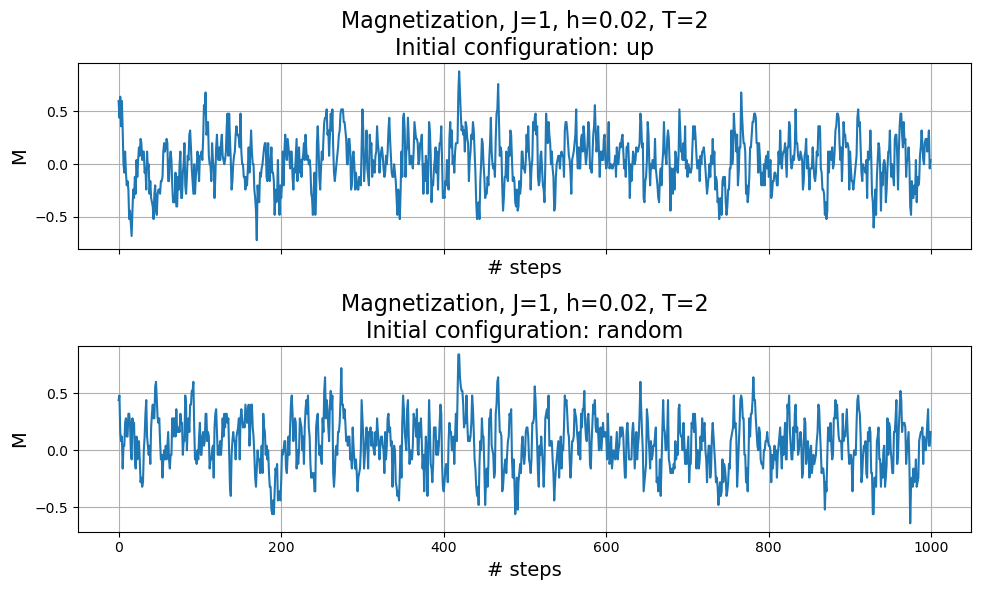

In [37]:
plot_transiente()

**Figure 1.** Instantaneous magnetization as a function of steps at $T=2$ and $h=0.02$, obtained with the Metropolis algorithm. Two different initial spin configurations were considered: fully ordered (all spins up, top panel) and random (bottom panel). In both cases the system equilibrates rapidly, and the transient is negligible.  



In the following figure I present the comparison between the thermodynamic observables computed with the Metropolis and Gibbs algorithms and their corresponding analytical results. The two sampling schemes are expected to generate spin configurations distributed according to the same Boltzmann weight, hence they should yield statistically consistent results.  

The plots clearly demonstrate this consistency: both methods provide data that overlap within error bars and reproduce the theoretical predictions across the entire investigated temperature range. The error bars, obtained through the data blocking method, confirm the statistical reliability of the sampling and the robustness of the numerical implementation.  


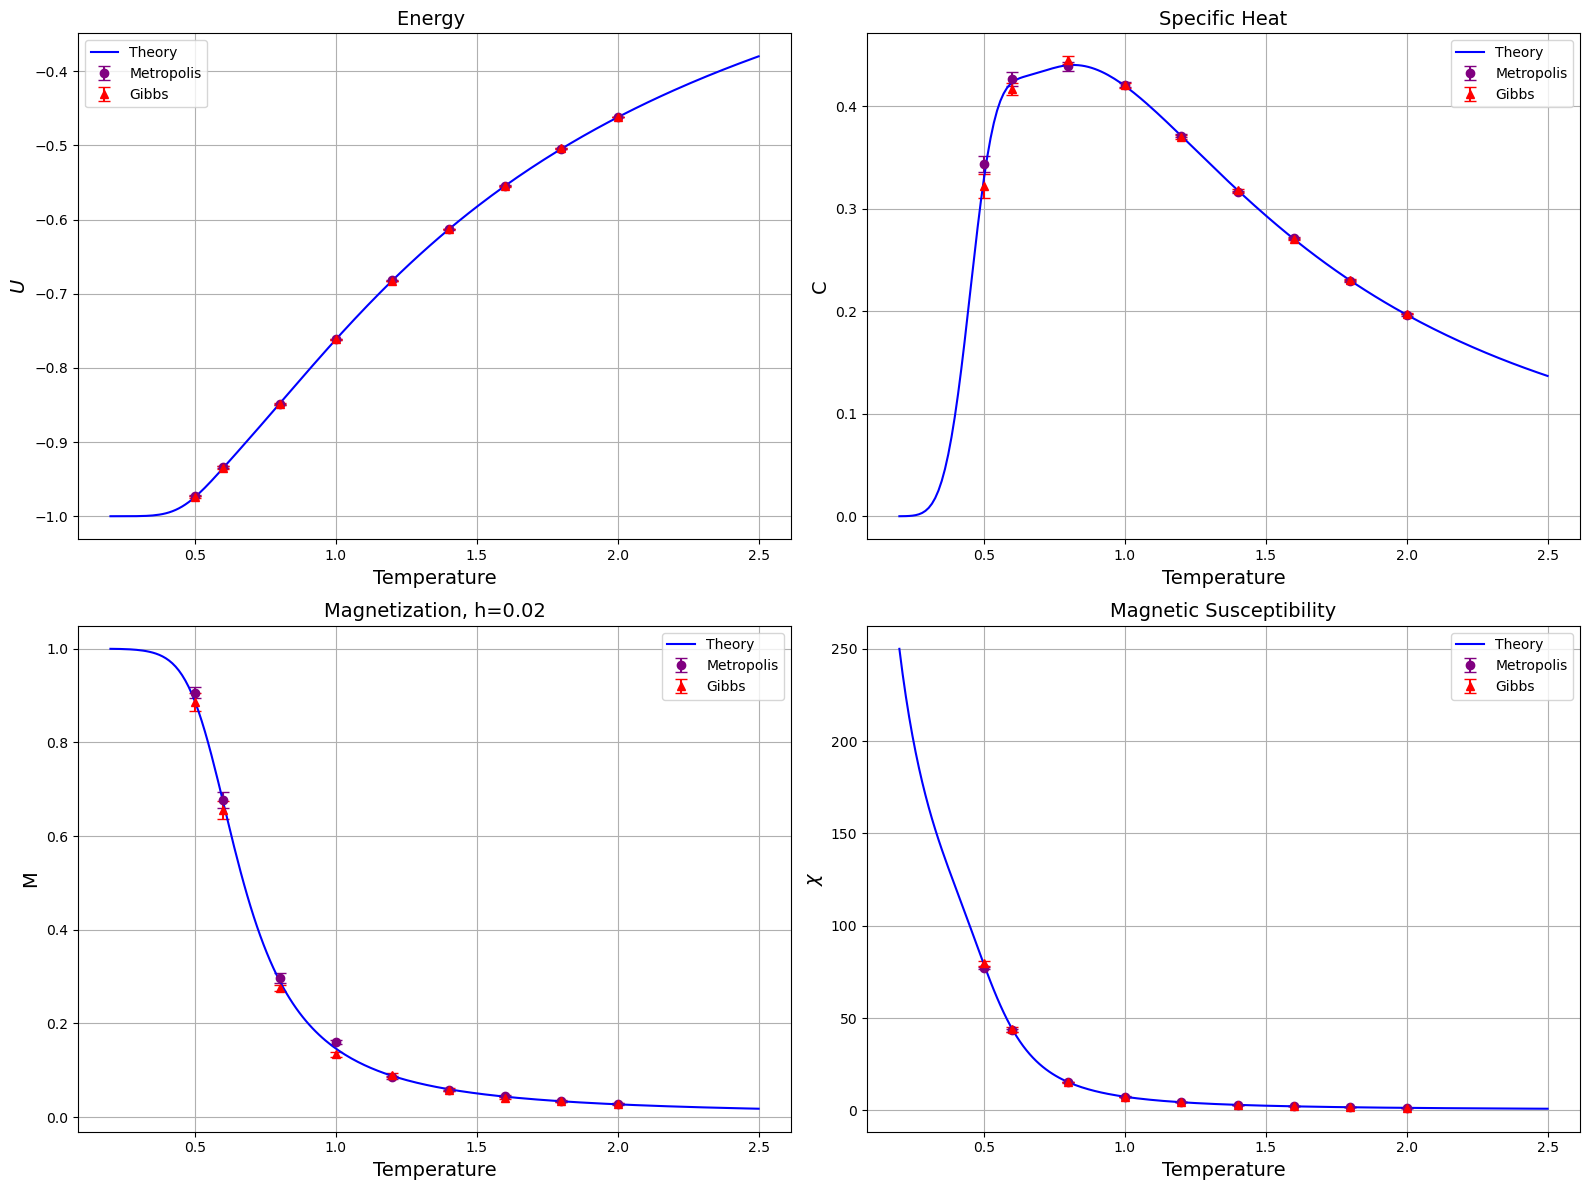

In [38]:
plot_observables()

**Figure 2.** Energy per particle, specific heat, magnetization, and magnetic susceptibility as a function of temperature for the one–dimensional Ising model with $J=1$ and $N=50$. A magnetic field $h=0.02$ was applied to measure magnetization. The markers represent the simulation results obtained with the Metropolis (purple circles) and Gibbs (red triangles) algorithms, while the solid blue line corresponds to the exact analytical solution.
